In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata,study_results,how = 'inner',on = 'Mouse ID')
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
mousecnt = study_df['Mouse ID'].count()
mousecnt

1893

In [11]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = study_df[study_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_data = study_df[study_df.duplicated(['Mouse ID',])]
all_duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_study_df = study_df.drop_duplicates('Mouse ID')
new_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [17]:
 # Checking the number of mice in the clean DataFrame.
    
newmousecnt = new_study_df['Mouse ID'].count()
newmousecnt

249

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Grouping by drug Regimen

mean = study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev = study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Dev":stddev,"SEM":sem})
summary_df








,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggmean = study_df.groupby('Drug Regimen').agg('Tumor Volume (mm3)').mean()


agg_summary_df = pd.DataFrame({"Mean":aggmean})
agg_summary_df



,Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


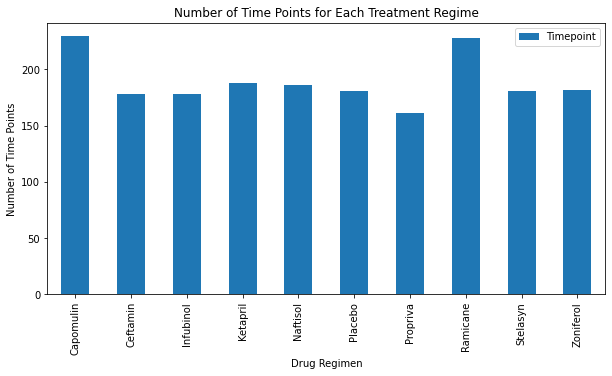

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

bar_data = pd.DataFrame(study_df.groupby(['Drug Regimen']).count()).reset_index()
bar_data

bar_df = bar_data[["Drug Regimen","Timepoint"]]
bar_df = bar_df.set_index("Drug Regimen")

bar_df.plot(kind = "bar",figsize=(10,5))

plt.title("Number of Time Points for Each Treatment Regime")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
plt.show()


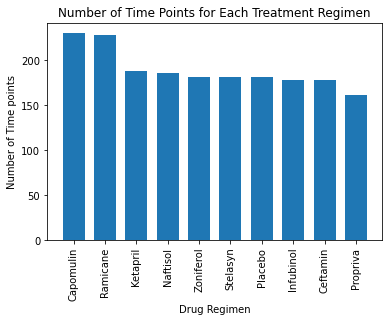

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

total_points = study_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(total_points))
                                
plt.bar(x_axis,total_points,width = 0.7)

#Create label for x axis 
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, total_points.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time points")
plt.title('Number of Time Points for Each Treatment Regimen')                                
plt.show()                                

                                
    




In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_plot = study_df['Sex'].value_counts()
gender_plot


Male      958
Female    935
Name: Sex, dtype: int64

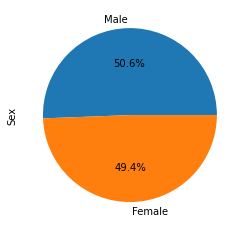

In [75]:
pie_plot = gender_plot.plot.pie(autopct="%1.1f%%")

In [69]:
plt.clf()
plt.cla()
plt.close()


([<matplotlib.patches.Wedge at 0x2101bcd6760>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

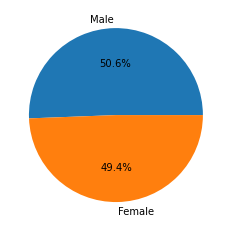

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_plot = study_df['Sex'].value_counts()
plt.pie(gender_plot,labels = gender_plot.index.values,autopct="%1.1f%%")

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tp_df = pd.DataFrame(study_df.groupby('Mouse ID')['Timepoint'].max().sort_values().reset_index().rename(columns={'Timepoint':'MaxTimepoint'}))

max_tp_df



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mergedata_df = pd.merge(study_df,max_tp_df,on = 'Mouse ID')
mergedata_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MaxTimepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [119]:
## Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in drugs:
    temp_df = mergedata_df.loc[mergedata_df['Drug Regimen'] == drug]
    #  # add subset dataframe to find final timepoint
    final_vol_df = temp_df.loc[temp_df['Timepoint'] == temp_df['MaxTimepoint']]
    
    #append all the tumor values to tumor value
    vol = final_vol_df['Tumor Volume (mm3)']
    tumor_vol.append(vol)
    
   # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    # Find upper and lower bounds to help identify outliers for each regimen
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
      # Quantitatively check for outliers
    outliers_count = (vol.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_vol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

   
   

    
    


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


<function matplotlib.pyplot.show(close=None, block=None)>

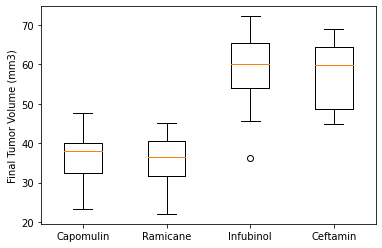

In [122]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

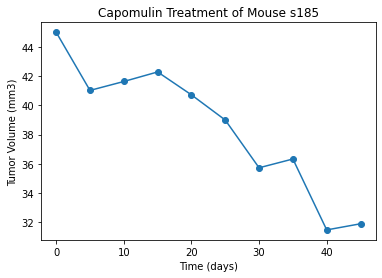

In [126]:
 # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = study_df.loc[study_df['Mouse ID']=='y793']
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'],marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show

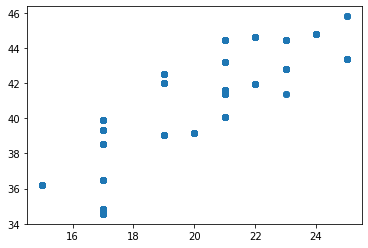

In [134]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Lets pick only capomulin

capo_df = study_df.loc[study_df['Drug Regimen'] == 'Capomulin']
# Find avg tumor for each mouse

avg_vol_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)' : 'avg_tumor_vol'})
#merge
avg_vol_df = pd.merge(capo_df,avg_vol_df,on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']]
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x, y)
plt.show()
